## Theoretical Question##

**1. What is K-Nearest Neighbors (KNN) and how does it work?**
KNN is a non-parametric algorithm that classifies data points based on the majority class (or average value for regression) of their K nearest neighbors in the feature space using a distance metric.

**2. What is the difference between KNN Classification and KNN Regression?**
KNN Classification predicts class labels based on majority voting among neighbors, while KNN Regression predicts continuous values by averaging neighbor values.

**3. What is the role of the distance metric in KNN?**
The distance metric determines how closeness is measured between points; common metrics include Euclidean, Manhattan, and Minkowski.

**4. What is the Curse of Dimensionality in KNN?**
As dimensions increase, data points become more sparse, making distance-based methods like KNN less effective due to loss of discrimination between neighbors.

**5. How can we choose the best value of K in KNN?**
By using cross-validation to test different values and selecting the one that gives the best performance on validation data.

**6. What are KD Tree and Ball Tree in KNN?**
They are data structures used to speed up nearest neighbor searches by organizing data in a tree format.

**7. When should you use KD Tree vs. Ball Tree?**
Use KD Tree for low-dimensional data and Ball Tree for high-dimensional or non-uniformly distributed data.

**8. What are the disadvantages of KNN?**
High computational cost on large datasets, sensitive to irrelevant features and noise, and poor performance in high dimensions.

**9. How does feature scaling affect KNN?**
It ensures that all features contribute equally to distance calculations; without scaling, features with larger ranges dominate.

**10. What is PCA (Principal Component Analysis)?**
PCA is a dimensionality reduction technique that transforms correlated features into a smaller set of uncorrelated components.

**11. How does PCA work?**
PCA computes the eigenvectors of the data’s covariance matrix and projects data onto the directions with the most variance.

**12. What is the geometric intuition behind PCA?**
PCA finds new axes (principal components) that best capture the spread (variance) of data, effectively rotating and scaling the dataset.

**13. What is the difference between Feature Selection and Feature Extraction?**
Feature selection picks a subset of original features; feature extraction (like PCA) creates new features by transforming original ones.

**14. What are Eigenvalues and Eigenvectors in PCA?**
Eigenvectors define the direction of principal components, and eigenvalues represent the amount of variance captured by each component.

**15. How do you decide the number of components to keep in PCA?**
By looking at the cumulative explained variance and selecting the number of components that retain a desired percentage (e.g., 95%).

**16. Can PCA be used for classification?**
Yes, PCA can reduce dimensionality before classification, improving speed and sometimes accuracy, though it doesn’t directly classify.

**17. What are the limitations of PCA?**
It assumes linear relationships, may lose interpretability, is sensitive to outliers, and doesn’t perform well with non-linear data.

**18. How do KNN and PCA complement each other?**
PCA reduces dimensionality and noise, which can improve KNN’s performance by reducing computation and improving neighbor relevance.

**19. How does KNN handle missing values in a dataset?**
KNN can impute missing values by averaging the values of the K nearest neighbors for that feature.

**20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**
PCA maximizes variance without considering labels, while LDA maximizes class separability using label information.




In [1]:
#Practical questions##

In [2]:
# 1. Train a KNN Classifier on the Iris dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9736842105263158


In [3]:
# 2. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = KNeighborsRegressor()
model.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)))


MSE: 491.0416620268724


In [33]:
# 3. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for p in [2, 1]:
    model = KNeighborsClassifier(p=p)
    model.fit(X_train, y_train)
    print(f"p={p} Accuracy:", accuracy_score(y_test, model.predict(X_test)))


p=2 Accuracy: 0.7333333333333333
p=1 Accuracy: 0.7555555555555555


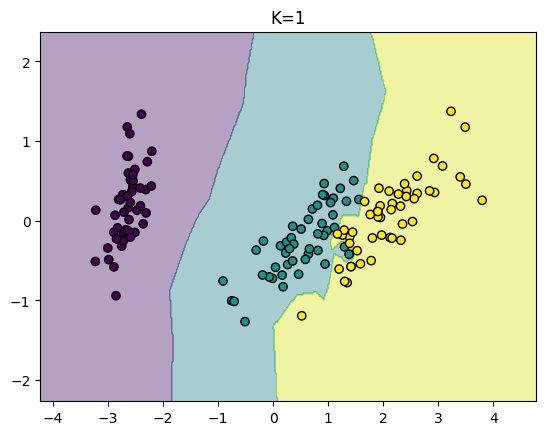

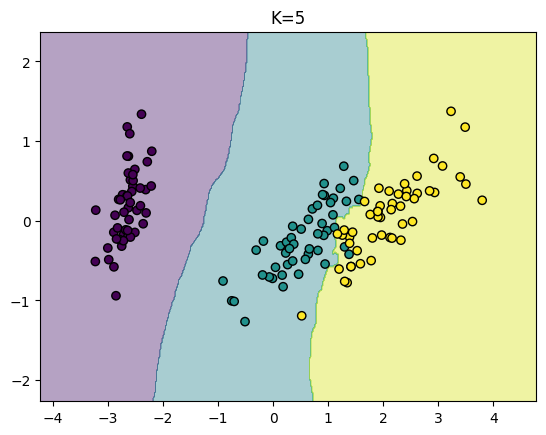

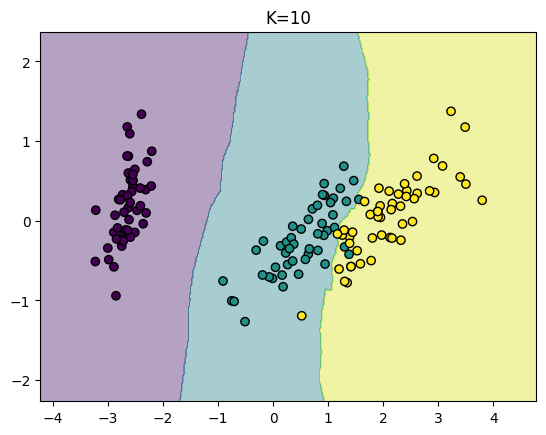

In [5]:
# 4. Train a KNN Classifier with different values of K and visualize decision boundaries

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

X, y = load_iris(return_X_y=True)
X = PCA(n_components=2).fit_transform(X)

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for k in [1, 5, 10]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"K={k}")
    plt.show()


In [34]:
# 5. Apply Feature Scaling before training a KNN model and compare results with unscaled data

from sklearn.preprocessing import StandardScaler

# Unscaled
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Unscaled Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Scaled
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model.fit(X_train_s, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, model.predict(X_test_s)))


Unscaled Accuracy: 0.7333333333333333
Scaled Accuracy: 0.9777777777777777


In [7]:
# 6. Train a PCA model on synthetic data and print the explained variance ratio for each component

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

X, _ = make_classification(n_samples=100, n_features=5, random_state=0)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.48425992 0.40606598 0.1096741  0.         0.        ]


In [35]:
# 7. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
acc_no_pca = accuracy_score(y_test, model.predict(X_test))

model.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, model.predict(X_test_pca))

print("Without PCA Accuracy:", acc_no_pca)
print("With PCA Accuracy:", acc_pca)


Without PCA Accuracy: 0.7333333333333333
With PCA Accuracy: 0.6888888888888889


In [36]:
# 8. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1, 3, 5, 7], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.7743589743589743


In [37]:
# 9. Train a KNN Classifier and check the number of misclassified samples

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
misclassified = (y_pred != y_test).sum()
print("Misclassified Samples:", misclassified)


Misclassified Samples: 12


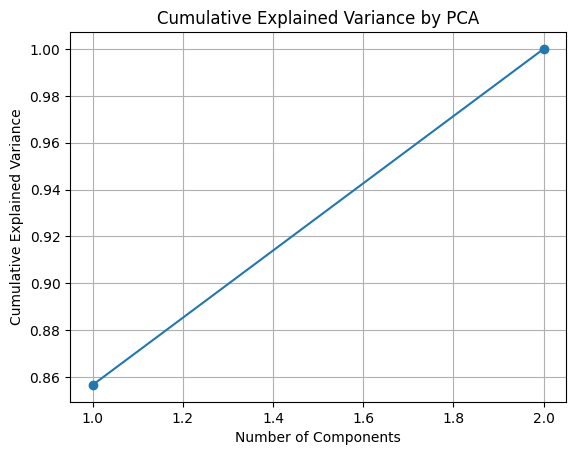

In [38]:
# 10. Train a PCA model and visualize the cumulative explained variance

import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA")
plt.grid()
plt.show()


In [12]:
# 11. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for w in ['uniform', 'distance']:
    model = KNeighborsClassifier(weights=w)
    model.fit(X_train, y_train)
    print(f"Accuracy with weights={w}: {accuracy_score(y_test, model.predict(X_test))}")


Accuracy with weights=uniform: 0.9736842105263158
Accuracy with weights=distance: 0.9736842105263158


In [13]:
# 12. Train a KNN Regressor and analyze the effect of different K values on performance

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for k in [1, 3, 5, 10]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"K={k}, MSE={mse}")


K=1, MSE=1150.121060609671
K=3, MSE=487.95148984418023
K=5, MSE=440.6871249579593
K=10, MSE=676.5924580585128


In [14]:
# 13. Implement KNN Imputation for handling missing values in a dataset

import numpy as np
from sklearn.impute import KNNImputer

data = np.array([[1, 2], [3, np.nan], [7, 6], [np.nan, 8]])
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(data)
print(imputed_data)


[[1. 2.]
 [3. 4.]
 [7. 6.]
 [4. 8.]]


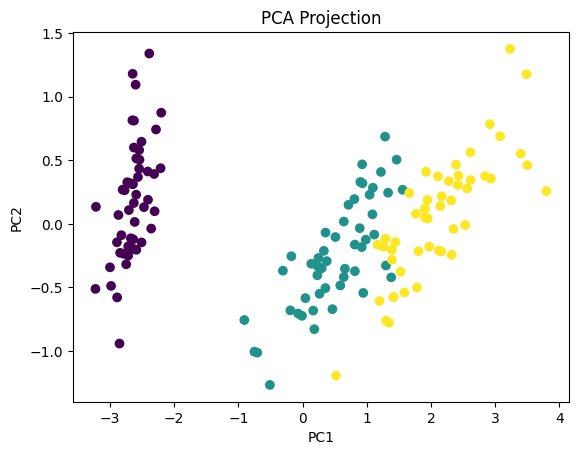

In [15]:
# 14. Train a PCA model and visualize the data projection onto the first two principal components

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()


In [20]:
# 15. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for algo in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algo)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{algo} accuracy: {acc}")


kd_tree accuracy: 0.9736842105263158
ball_tree accuracy: 0.9736842105263158


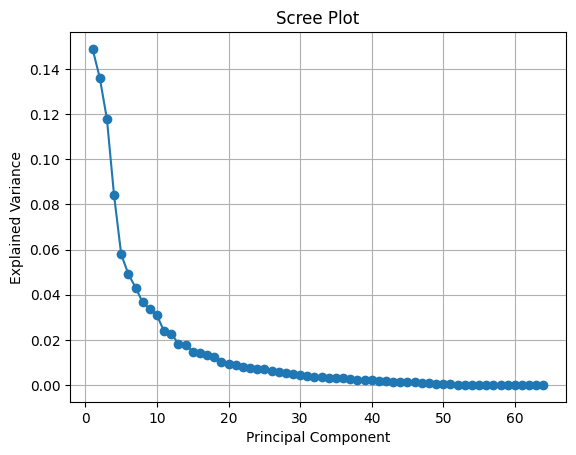

In [21]:
# 16. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X = load_digits().data
pca = PCA().fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()


In [22]:
# 17. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.metrics import classification_report

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [23]:
# 18. Train a PCA model and analyze the effect of different numbers of components on accuracy

for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = KNeighborsClassifier()
    model.fit(X_train_pca, y_train)
    acc = model.score(X_test_pca, y_test)
    print(f"Components={n}, Accuracy={acc}")


Components=1, Accuracy=0.8947368421052632
Components=2, Accuracy=0.9736842105263158
Components=3, Accuracy=0.9736842105263158
Components=4, Accuracy=0.9736842105263158


In [24]:
# 19. Train a KNN Classifier with different leaf_size values and compare accuracy

for leaf in [10, 20, 30, 50]:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train, y_train)
    print(f"Leaf Size={leaf}, Accuracy={model.score(X_test, y_test)}")


Leaf Size=10, Accuracy=0.9736842105263158
Leaf Size=20, Accuracy=0.9736842105263158
Leaf Size=30, Accuracy=0.9736842105263158
Leaf Size=50, Accuracy=0.9736842105263158


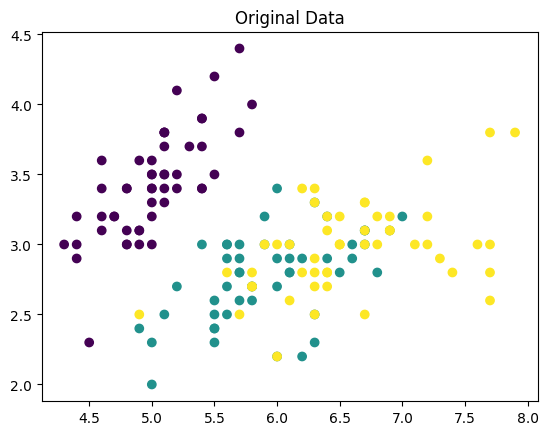

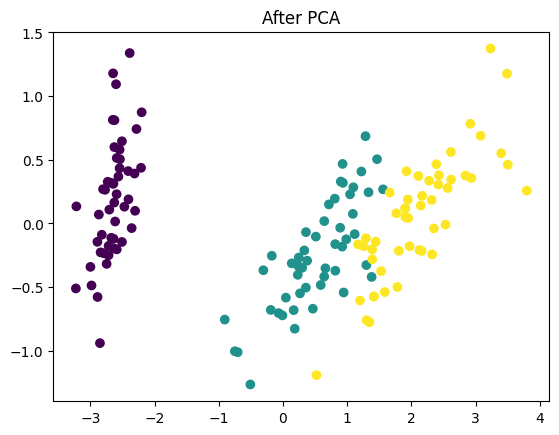

In [25]:
# 20. Train a PCA model and visualize how data points are transformed before and after PCA

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X, y = load_iris(return_X_y=True)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Data")
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("After PCA")
plt.show()


In [26]:
# 21. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.81      0.81      0.81        21
           2       0.29      0.25      0.27         8

    accuracy                           0.73        45
   macro avg       0.64      0.64      0.64        45
weighted avg       0.72      0.73      0.73        45



In [27]:
# 22. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for p in [1, 2]:
    model = KNeighborsRegressor(p=p)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"p={p}, MSE={mean_squared_error(y_test, pred)}")


p=1, MSE=0.25866666666666666
p=2, MSE=0.29777777777777775


In [28]:
# 23. Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0, 1, 2])
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
print("ROC-AUC Score:", roc_auc_score(y_bin, y_prob, multi_class='ovr'))


ROC-AUC Score: 0.8720792837172148


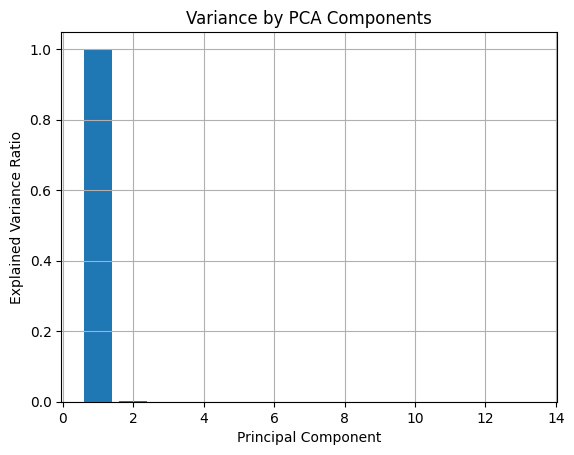

In [29]:
# 24. Train a PCA model and visualize the variance captured by each principal component

pca = PCA().fit(X)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance by PCA Components")
plt.grid()
plt.show()


In [30]:
# 25. Train a KNN Classifier and perform feature selection before training

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_new, y_train)
print("Accuracy after Feature Selection:", model.score(selector.transform(X_test), y_test))


Accuracy after Feature Selection: 0.7333333333333333


In [31]:
# 26. Train a PCA model and visualize the data reconstruction error after reducing dimensions

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 1.3141299687799461


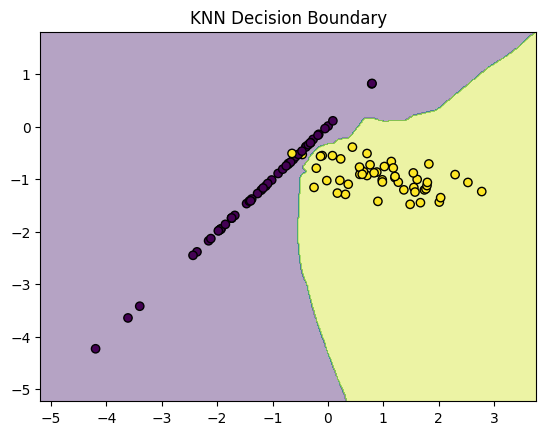

In [32]:
# 27. Train a KNN Classifier and visualize the decision boundary

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("KNN Decision Boundary")
plt.show()
